In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib as mpl

L, W = 80, 80 # lattice size.
G = nx.grid_2d_graph(L, W)
pos = dict( (n, n) for n in G.nodes() )

In [14]:
# Get Laplacian
K = nx.linalg.laplacianmatrix.laplacian_matrix(G).toarray()

print(K)

[[ 2 -1  0 ...  0  0  0]
 [-1  3 -1 ...  0  0  0]
 [ 0 -1  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  3 -1  0]
 [ 0  0  0 ... -1  3 -1]
 [ 0  0  0 ...  0 -1  2]]


We know from Applied Maths last year that $Kx=f$ where $f$ is the net current out of a node. We will assume that Kirchoff's current law holds at all nodes except the source and sink nodes, so $f=0$ at these nodes.

In this situation we have a Dirichlet type problem according to last year's notes, and our matrix equation is

$$K \begin{pmatrix} \textbf{1} \\ \textbf{x} \\ \textbf{0} \end{pmatrix} = \begin{pmatrix} \textbf{f} \\ \textbf{0} \\ \textbf{-f} \end{pmatrix}$$

where 

- $\textbf{1}$ is a $W\times 1$ vector of ones, 

- $\textbf{x}$ is an $((L-2)\cdot W)\times 1$ vector of the voltages at each node, 

- $\textbf{0}$ is a $W\times 1$ vector of zeroes,

- $\textbf{f}$ is the net current out of each of the source nodes.

We want to solve for $\textbf{x}$ so we need the middle $((L-2)\cdot W)$ rows of $K$. Since we have a rectangular graph, we get the equation

$\begin{pmatrix} A & B & A \end{pmatrix}\begin{pmatrix} \textbf{1} \\ \textbf{x} \\ \textbf{0}\end{pmatrix} = \textbf{0} \implies \textbf{x} = B^{-1}A\textbf{1}$

In [15]:
A = K[W:-W, :W]
B = K[W:-W, W:-W]
ones = np.ones((W,1))
x = (-np.linalg.inv(B) @ A @ ones).flatten() # apparently, flatten makes it a 1d array

potentials = np.concatenate([[1]*W, x, [0]*W])

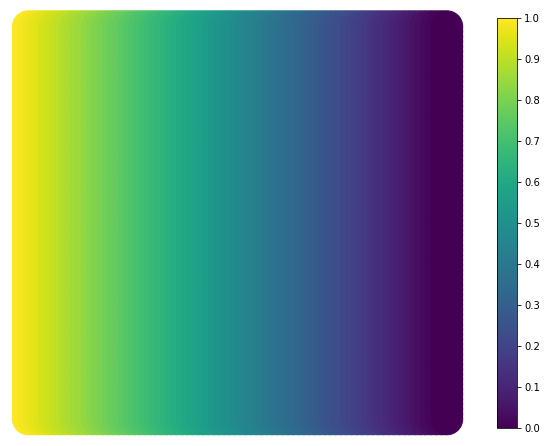

In [29]:
# Make the node labels the potentials.
labels = {}
i = 0
for node in G:
    labels[node] = round(potentials[i], 2)
    i += 1
nx.relabel_nodes(G, labels)

cmap = 'viridis' # change the colormap here!

# Draw
plt.figure(figsize=(8, 6))
fig = nx.draw(G,node_size=1000, pos=pos, with_labels=False, labels=labels, cmap=cmap, node_color=potentials)

# Colorbar (CODE WAS COPIED AND SLIGHTLY MODIFIED)
# Source: https://stackoverflow.com/questions/43805821/matplotlib-add-colorbar-to-non-mappable-object
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0,1,11), shrink=0.95)

plt.show();